## 네이버 스포츠뉴스 --> 워드클라우드

In [1]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

- 네이버 스포츠 뉴스 크롤링

In [2]:
sports = ['kbaseball','wbaseball','kfootball','wfootball','basketball','volleyball','golf','general']
base_url = 'https://sports.news.naver.com/'
suffix_url = '/news/index?isphoto=N&page='

In [13]:
driver = webdriver.Chrome()
url = f'{base_url}kbaseball{suffix_url}1'
driver.get(url)

In [4]:
# 기사 목록
soup = BeautifulSoup(driver.page_source, 'html.parser')
lis = soup.select('.news_list > ul > li')
len(lis)

20

In [5]:
# 기사 제목
li = lis[0]
title = li.select_one('.title').get_text().strip()
title

'NC 구창모, 끝내 항저우행 불발 ‘김성윤-김영규 대체 발탁’'

- 종목별로 몇 페이가 있는지 확인하기

In [6]:
# 10 페이지가 넘는 종목 선택
url = f'{base_url}wfootball{suffix_url}1'
driver.get(url)

In [14]:
sports_dict = {}
for sport in sports:
    url = f'{base_url}{sport}{suffix_url}1'
    driver.get(url)
    time.sleep(2)

    next_clicked = 0
    while True:
        try:
            driver.find_element(By.CSS_SELECTOR, '.paginate > .next').click()
            next_clicked += 1
            time.sleep(2)
        except:     # 모든 종목의 마지막 페이지가 있는 화면
            pages = driver.find_elements(By.CSS_SELECTOR, '.paginate > a')
            if next_clicked == 0:
                num_pages = len(pages) + 1
            else:
                num_pages = next_clicked * 10 + len(pages)
            sports_dict[sport] = num_pages
            break

sports_dict

{'kbaseball': 8,
 'wbaseball': 5,
 'kfootball': 8,
 'wfootball': 15,
 'basketball': 7,
 'volleyball': 5,
 'golf': 3,
 'general': 12}

- 모든 종목, 모든 페이지에 대해서 타이틀 가져오기

In [15]:
titles = ''
for sport, num_pages in sports_dict.items():
    for page in range(1, num_pages + 1):
        url = f'{base_url}{sport}{suffix_url}{page}'
        driver.get(url)
        time.sleep(2)

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        lis = soup.select('.news_list > ul > li')     
        for li in lis:
            titles += li.select_one('.title').get_text().strip() + '\n'

In [16]:
driver.close()
titles.count('\n')

1198

- Word Cloud 만들기

In [17]:
import re, nltk
from konlpy.tag import Okt 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [19]:
okt = Okt()
tokens = okt.nouns(titles)
tokens[:10]

['송영진', '이닝', '엘리', '아스', '등판', '강', '생존', '싸움', '전', '마운드']

- 사각형 워드 클라우드

In [20]:
news = nltk.Text(tokens, name='스포츠 기사')
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf', relative_scaling=0.4
).generate_from_frequencies(dict(news.vocab().most_common(300)))

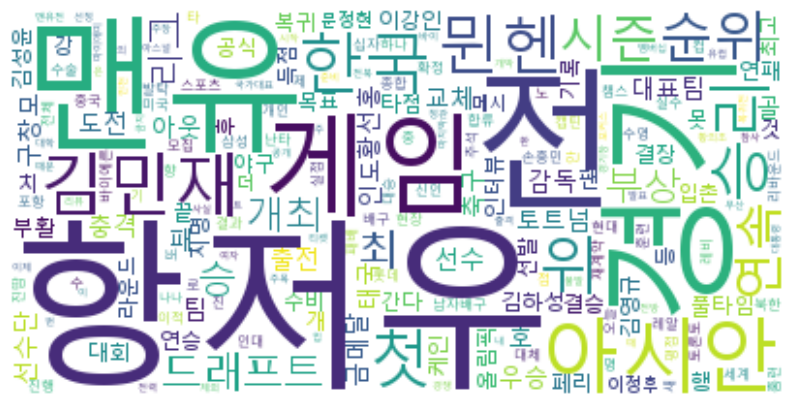

In [21]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

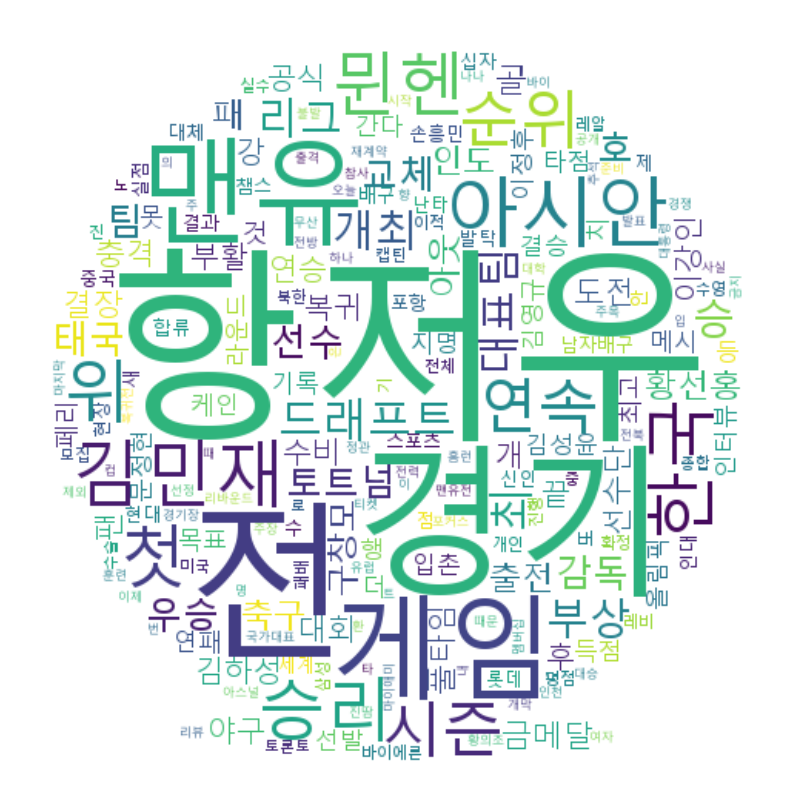

In [22]:
mask = np.array(Image.open('data/ball.jpg'))
wc = WordCloud(
    background_color='white', random_state=2023, mask=mask,
    font_path='c:/Windows/Fonts/malgun.ttf', relative_scaling=0.4
).generate_from_frequencies(dict(news.vocab().most_common(300)))

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');